In [1]:
import importlib
import Parallel_Run_Average_Entropy_Shared_Mem
importlib.reload(Parallel_Run_Average_Entropy_Shared_Mem)
from Parallel_Run_Average_Entropy_Shared_Mem import *

import matplotlib.pyplot as plt
import sys

sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Gillespie/Analysis/')
sys.path.append('/home/hugo/PostDoc/aging_condensates/Gillespie/Analysis/')
from ToolBox import *

sys.path.append('/home/hcleroy/Extra_Module_py')
sys.path.append('/home/hugo/Extra_Module_py')
import formated_matplotlib

Ec = lambda L,N : 3/2*np.log(L/N* np.pi/3)

In [15]:
# gillespie parameter
Nlinker = 2
ell_tot = 10**3
V = 4/3*np.pi*(ell_tot/6)**1.5
kdiff = 1/(V) # for 1D
Energy = -15
Nprocess = 1000
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]

# Simulation parameters
step_tot = 10000
compute_steps = 10

In [16]:
# one linker
ST1 = average_simulations(args,step_tot,compute_steps)

52.488400000000006


In [17]:
# 2 linkers
for n in range(args.__len__()):
    args[n][-2] = 3
step_tot = 20000
ST2 = average_simulations(args,step_tot,compute_steps)

40.62183499999998


In [18]:
# 3 linkers
for n in range(args.__len__()):
    args[n][-2] = 4
step_tot = 30000
ST3 = average_simulations(args,step_tot,compute_steps)

30.242980000000017


In [19]:
# 10 linkers
for n in range(args.__len__()):
    args[n][-2] = 10
step_tot = 100000
ST10 = average_simulations(args,step_tot,compute_steps)

KeyboardInterrupt: 

In [26]:
#np.save("Res/1_2_3_10_linkers/1_linker.npy",ST1)
#np.save("Res/1_2_3_10_linkers/2_linker.npy",ST2)
#np.save("Res/1_2_3_10_linkers/3_linker.npy",ST3)
#np.save("Res/1_2_3_10_linkers/10_linker.npy",ST10)

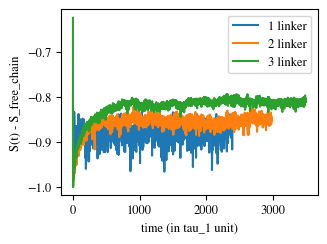

In [20]:
plt.plot(ST1[:,0],ST1[:,1]  /abs(min(ST1[:,1])),label='1 linker')
plt.plot(ST2[:,0],ST2[:,1]  /abs(min(ST2[:,1])),label='2 linker')
plt.plot(ST3[:,0],ST3[:,1]  /abs(min(ST3[:,1])),label='3 linker')
#plt.plot(ST10[:,0],ST10[:,1]/abs(min(ST10[:,1])),label='10 linker')
plt.xlabel('time (in tau_1 unit)')
plt.ylabel('S(t) - S_free_chain')
#plt.xscale('log')
plt.legend()
#plt.savefig('Res/1_2_3_10_linkers/S_of_t.svg',bbox_inches='tight',transparent=True)

In [8]:
# gillespie parameter
Nlinker = 10
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,1] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 30

6.976931674754073


In [9]:
# 10 linkers
ST10 = average_simulations(args,step_tot,compute_steps)

23.53476999999999


In [10]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,1] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30

5.937210903914155


In [11]:
ST20 = average_simulations(args,step_tot,compute_steps)

14.464104999999995


In [12]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Energy = -15
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,1] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 300000
compute_steps = 30

5.329013241751908


In [13]:
ST30 = average_simulations(args,step_tot,compute_steps)

10.96388


In [28]:
#np.save("Res/10_20_30_linkers/10_linker.npy",ST10)
#np.save("Res/10_20_30_linkers/20_linker.npy",ST20)
#np.save("Res/10_20_30_linkers/30_linker.npy",ST30)

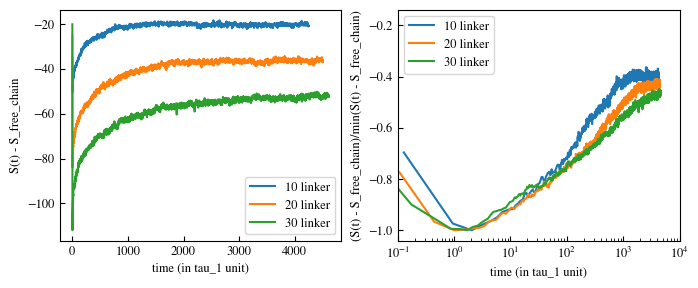

In [30]:
fig, ax = plt.subplots(ncols=2,figsize=(8,3))
ax[0].plot(ST10[:,0],ST10[:,1],label='10 linker')#/abs(min(ST10[:,1]))
ax[0].plot(ST20[:,0],ST20[:,1],label='20 linker')#/abs(min(ST20[:,1]))
ax[0].plot(ST30[:,0],ST30[:,1],label='30 linker')#/abs(min(ST30[:,1]))
ax[1].plot(ST10[:,0],ST10[:,1]/abs(min(ST10[:,1])),label='10 linker')
ax[1].plot(ST20[:,0],ST20[:,1]/abs(min(ST20[:,1])),label='20 linker')
ax[1].plot(ST30[:,0],ST30[:,1]/abs(min(ST30[:,1])),label='30 linker')

ax[0].set_xlabel('time (in tau_1 unit)')
ax[0].set_ylabel('S(t) - S_free_chain')
ax[1].set_xlabel('time (in tau_1 unit)')
ax[1].set_ylabel('(S(t) - S_free_chain)/min(S(t) - S_free_chain)')
#ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[1].set_xlim(10**-1,10**4)
ax[0].legend()
ax[1].legend()
#fig.savefig('Res/10_20_30_linkers/S_of_t.svg',transparent=True,bbox_inches='tight')

In [19]:
# gillespie parameter
Nlinker = 10
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Energy = -8
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,1] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 30

6.976931674754073


In [20]:
ST10_b = average_simulations(args,step_tot,compute_steps)

17.18511


In [21]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Energy = -8
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,1] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30

5.937210903914155


In [22]:
ST20_b = average_simulations(args,step_tot,compute_steps)

10.019660000000002


In [23]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Energy = -8
Nprocess = 100
args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,1] for _ in range(Nprocess)]
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 300000
compute_steps = 30

5.329013241751908


In [24]:
ST30_b = average_simulations(args,step_tot,compute_steps)

7.464996666666666


In [31]:
#np.save("Res/E_8_15/10_linker.npy",ST10_b)
#np.save("Res/E_8_15/20_linker.npy",ST20_b)
#np.save("Res/E_8_15/30_linker.npy",ST30_b)

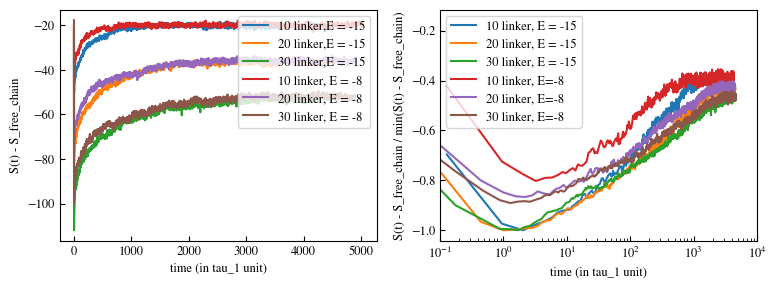

In [38]:
fig, ax = plt.subplots(ncols=2,figsize=(9,3))
ax[0].plot(ST10[:,0],ST10[:,1],label='10 linker,E = -15')#/abs(min(ST10[:,1]))
ax[0].plot(ST20[:,0],ST20[:,1],label='20 linker,E = -15')#/abs(min(ST20[:,1]))
ax[0].plot(ST30[:,0],ST30[:,1],label='30 linker,E = -15')#/abs(min(ST30[:,1]))
ax[1].plot(ST10[:,0],ST10[:,1]/abs(min(ST10[:,1])),label='10 linker, E = -15')
ax[1].plot(ST20[:,0],ST20[:,1]/abs(min(ST20[:,1])),label='20 linker, E = -15')
ax[1].plot(ST30[:,0],ST30[:,1]/abs(min(ST30[:,1])),label='30 linker, E = -15')



ax[0].plot(ST10_b[:,0],ST10_b[:,1],label='10 linker, E = -8')#/abs(min(ST10[:,1]))
ax[0].plot(ST20_b[:,0],ST20_b[:,1],label='20 linker, E = -8')#/abs(min(ST20[:,1]))
ax[0].plot(ST30_b[:,0],ST30_b[:,1],label='30 linker, E = -8')#/abs(min(ST30[:,1]))
ax[1].plot(ST10[:,0],ST10_b[:,1]/abs(min(ST10[:,1])),label='10 linker, E=-8')
ax[1].plot(ST20[:,0],ST20_b[:,1]/abs(min(ST20[:,1])),label='20 linker, E=-8')
ax[1].plot(ST30[:,0],ST30_b[:,1]/abs(min(ST30[:,1])),label='30 linker, E=-8')

ax[0].set_xlabel('time (in tau_1 unit)')
ax[0].set_ylabel('S(t) - S_free_chain')
ax[1].set_xlabel('time (in tau_1 unit)')
ax[1].set_ylabel('S(t) - S_free_chain / min(S(t) - S_free_chain)')
ax[1].set_xscale('log')
ax[1].set_xlim(0.1,10**4)
ax[0].legend(loc=1)
ax[1].legend()
#fig.savefig('Res/E_8_15/Entropy_timeevolution_vs_Nlinker.svg',transparent=True,bbox_inches= 'tight')

In [39]:
# let us run more of these, but parametering the relative distance with the critical energy

In [23]:
NRG = lambda eta,Ec : (1+eta)*Ec

In [24]:
# gillespie parameter
Nlinker = 10
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 100000
compute_steps = 30
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

6.976931674754073


In [25]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST10_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST10_"+str(truncate(Energy,3))+".npy",ST10_big)

KeyboardInterrupt: 

In [ ]:
# gillespie parameter
Nlinker = 20
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 200000
compute_steps = 30
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

5.937210903914155


In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST20_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST20_"+str(truncate(Energy,3))+".npy",ST20_big)

array([ 5.32901324,  5.889962  ,  6.45091077,  7.01185953,  7.57280829,
        8.13375705,  8.69470582,  9.25565458,  9.81660334, 10.3775521 ,
       10.93850086, 11.49944963, 12.06039839, 12.62134715, 13.18229591,
       13.74324468, 14.30419344, 14.8651422 , 15.42609096, 15.98703973])

In [ ]:
# gillespie parameter
Nlinker = 30
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 300000
compute_steps = 30
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST30_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST30_"+str(truncate(Energy,3))+".npy",ST30_big)

In [ ]:
# gillespie parameter
Nlinker = 40
ell_tot = 10**3
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 400000
compute_steps = 40
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

4.897490133074237


In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST40_big = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST40_"+str(truncate(Energy,3))+".npy",ST40_big)

In [ ]:
# gillespie parameter
Nlinker = 40
ell_tot = 10**4
V = 2*((ell_tot/6)**1.5/Nlinker**0.5*3/4*np.pi)
kdiff = 5/(V) # for 1D
Nprocess = 100
print(Ec(ell_tot,Nlinker))
# Simulation parameters
step_tot = 400000
compute_steps = 40
Energy_range = NRG(np.linspace(0,2,20),Ec(ell_tot,Nlinker))

8.351367772565306


In [ ]:
for Energy in Energy_range:
    args = [[ell_tot,Energy,kdiff,np.random.randint(1000000),Nlinker,3] for _ in range(Nprocess)]
    ST40_LE4 = average_simulations(args,step_tot,compute_steps)
    np.save("Res/Big_Simul/ST_LE4_40_"+str(truncate(Energy,3))+".npy",ST40_LE4)